# Introductory applied machine learning (INFR10069)

<div align="right"><font color="blue" size="5">Your Score was 82.5 out of a total of 111.0, or 74.3%</font></div>

# Assignment 2: Linear regression

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. There are some questions which are **specific to those taking the Level-11 version** of the course (INFR11182 and INFR11152). These are clearly marked with the words **(LEVEL 11)** and must be completed by those taking the Level 11 course. Those on the Level 10 version (INFR10069) may (and are advised to) attempt such questions but this will not affect their mark in any way, nor will they get feedback on them.

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 18/10/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

All submissions happen electronically. To submit:

1. Fill out this notebook, and save it, making sure to **KEEP the name of the file UNCHANGED**.

1. On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

  ```submit iaml cw1 "02_LinearRegression.ipynb"```

  What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.
  
1. **Distance Learners:** To copy your work onto DICE (so that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example (replace entries in `[square brackets]` with your specific details):
```
filename="02_LinearRegression.ipynb"
local_scp_filepath=[DIRECTORY CONTAINING GIT REPOSITORY]${filename}
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
# rsync -rl ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
ssh [YOUR USERNAME]@${server_address}
ssh student.login
submit iaml cw1 "02_LinearRegression.ipynb"
```

**N.B.: This is still Coursework 1 (cw1)**

### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignment.

In [1]:
# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell

# System functionality
import sys
sys.path.append('..')

# Import Here any Additional modules you use. To import utilities we provide, use something like:
#   from utils.plotter import plot_hinton

# Your Code goes here:
import os
import pandas as pd
import scipy.stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz
%matplotlib inline
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

## Description of the dataset
This assignment is based on the automobile pricing dataset. Our goal will be to predict the price of automobiles based on various attributes. This data set consists of three types of entities: 

1. The specification of an automobile in terms of various characteristics 

1. Assigned insurance risk rating 
   * this rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuaries call this process ”symboling”. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. 

1. Normalized losses in use as compared to other cars
  * the third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year (avg_loss/car/year). 


To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We removed any instances that had one or more missing values and randomized the data set. The resulting representation is much more compact and can be used directly to perform our experiments.


## 1. Data Visualisation

Before jumping into our problem, it is beneficial to get a feel for the data we are dealing with in the rest of the assignment.

<a id='question_1_1'></a>
### ========== Question 1.1 --- [8 marks] ==========

Load the dataset `train_auto_numeric.csv` into a pandas DataFrame called `auto_numeric`. Using any suitable pandas functionality, 
1. [Code] summarise *and*
1. [Text] comment upon

the key features of the data. Show all your code!

<div align="right"><font color="blue" size="4">7.0/8.0</font></div>

In [2]:
# (1) # Your Code goes here:
auto_numeric = pd.read_csv(os.path.join(os.getcwd(), 'datasets', 'train_auto_numeric.csv'), delimiter = ',')
auto_numeric.info()
display(auto_numeric[0::30])
display(auto_numeric.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 16 columns):
normalized-losses          159 non-null float64
wheel-base                 159 non-null float64
length                     159 non-null float64
width                      159 non-null float64
height                     159 non-null float64
engine-size                159 non-null float64
bore                       159 non-null float64
stroke                     159 non-null float64
compression-ratio          159 non-null float64
engine-power               159 non-null float64
peak-rpm                   159 non-null float64
city-mpg                   159 non-null float64
highway-mpg                159 non-null float64
mean-effective-pressure    159 non-null float64
torque                     159 non-null float64
price                      159 non-null float64
dtypes: float64(16)
memory usage: 20.0 KB


,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
0,164.0,99.8,176.6,66.2,54.3,8.85,3.19,3.40,10.0,102000.0,5500.0,24.0,30.0,40.52,57.68,13950.0
30,107.0,97.2,169.1,65.5,53.5,9.03,3.24,3.16,8.7,94000.0,4900.0,25.0,30.0,52.66,46.81,12945.0
60,231.0,94.5,165.3,63.8,54.5,7.85,2.99,3.47,21.9,55000.0,4800.0,45.0,50.0,95.10,21.21,7099.0
90,186.0,94.5,168.9,68.3,52.0,20.49,3.94,3.11,9.5,143000.0,5500.0,19.0,27.0,8.08,344.02,22018.0
120,150.0,104.3,176.8,68.3,56.0,7.10,3.58,3.46,9.6,134000.0,5400.0,34.0,41.0,9.56,221.89,8358.0
150,125.0,94.5,171.7,66.5,54.5,16.78,3.34,2.07,9.2,110000.0,6600.0,24.0,54.0,9.58,306.48,15985.0


,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,121.955975,98.559748,171.698113,65.729560,53.925157,14.056352,3.294528,3.219874,10.446855,98528.301887,5072.012579,27.113208,32.327044,46.180503,200.055031,11684.723270
std,39.434186,5.803361,12.656791,2.292021,2.410446,17.143568,0.296959,0.381833,4.414796,34123.715967,549.988239,7.848229,8.231998,28.780966,513.289289,6744.910579
min,65.000000,86.600000,141.100000,60.300000,49.400000,3.390000,2.540000,2.070000,7.000000,48000.000000,4150.000000,15.000000,18.000000,0.490000,19.400000,5118.000000
25%,93.000000,94.500000,163.400000,64.000000,52.000000,6.960000,3.050000,3.070000,8.600000,69000.000000,4800.000000,22.000000,26.500000,21.775000,34.140000,7372.000000
50%,110.000000,97.000000,171.700000,65.400000,54.100000,9.030000,3.270000,3.270000,9.000000,92000.000000,5100.000000,26.000000,32.000000,49.800000,55.900000,9233.000000
75%,145.000000,101.200000,177.800000,66.500000,55.600000,14.885000,3.580000,3.410000,9.400000,116000.000000,5450.000000,31.000000,37.000000,68.495000,119.990000,14719.500000
max,256.000000,115.600000,202.600000,71.700000,59.800000,174.160000,3.940000,4.170000,23.000000,200000.000000,6600.000000,49.000000,54.000000,99.850000,3912.870000,42056.000000


<div align="right"><font color="blue" size="4">4.0</font></div>

(2) ***Your answer goes here:***
<br> There are 159 datapoints with 16 features each. All of the features take postive and continuous values.

<div align="right"><font color="blue" size="4">3.0</font></div>

<div align="left"><font color="green" size="4">Missing:
Is the data clean & free of anomalous data or extreme jumps in quantiles?</font></div>

### ========== Question 1.2 --- [18 marks] ==========

We will now examine the attributes in some detail. Familiarise yourself with the concept of Correlation Coefficients (start from the Lecture on Generalisation and Evaluation).

1. [Code] Analyse first the relationship between each attribute and price:
  1. Compute the correlation coefficient between each attribute and price, *and*
  1. Visualise the (pairwise) distribution of each attribute with price
1. [Text] Given the above, which attributes do you feel may be most useful in predicting the price? (mention at least 5). How did you reach this conclusion? *Hint: which is the more useful of the above tools?*
1. [Code] Now we will analyse the relationship between the attributes themselves. Use an appropriate pairwise visualisation tool to display graphically the relationship between each pair of attributes you selected in (2).
1. [Text] Do any attributes exhibit significant correlations between one-another? (restrict your analysis to useful attributes identified above)
1. [Text] Which attributes (give examples) would you consider removing if we wish to reduce the dimensionality of the problem and why?

<div align="right"><font color="blue" size="4">13.0/18.0</font></div>

In [3]:
# (1) (A) # Your Code goes here:
corr_m = auto_numeric.corr() # correlation coefficient matrix
display(corr_m.iloc[-1])     # choose the last row of the matrix, where is the attributes against the price attribute

normalized-losses          0.015368
wheel-base                 0.423511
length                     0.512883
width                      0.524326
height                     0.139563
engine-size                0.715125
bore                       0.365207
stroke                     0.127834
compression-ratio          0.125683
engine-power               0.443969
peak-rpm                  -0.099345
city-mpg                  -0.356790
highway-mpg               -0.438467
mean-effective-pressure   -0.104860
torque                     0.101435
price                      1.000000
Name: price, dtype: float64

<div align="right"><font color="blue" size="4">2.0</font></div>

<div align="left"><font color="green" size="4">It would be much more helpful to list the CC's of the attributes in CC value order.</font></div>

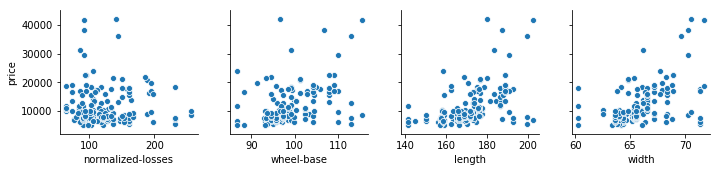

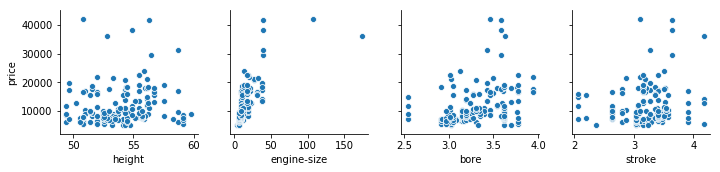

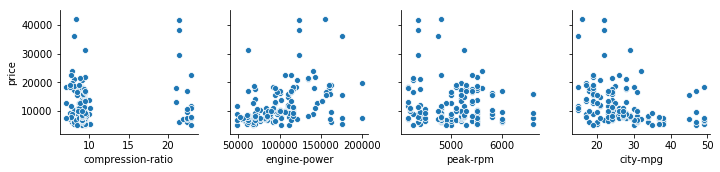

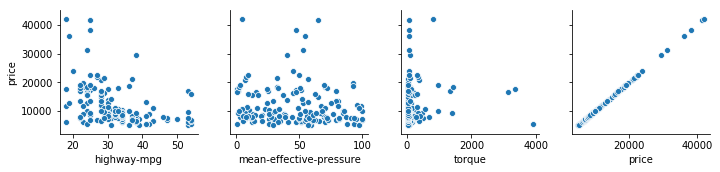

In [4]:
# (1) (B) # Your Code goes here:
plt1 = sns.pairplot(auto_numeric, x_vars=auto_numeric.columns[0:4], y_vars='price')
plt1 = sns.pairplot(auto_numeric, x_vars=auto_numeric.columns[4:8], y_vars='price')
plt1 = sns.pairplot(auto_numeric, x_vars=auto_numeric.columns[8:12], y_vars='price')
plt1 = sns.pairplot(auto_numeric, x_vars=auto_numeric.columns[12:16], y_vars='price')
plt.show()

<div align="right"><font color="blue" size="4">4.0</font></div>

(2) ***Your answer goes here:***
<br> 0.715125 engine-size
<br> 0.524326 width
<br> 0.512883 length
<br> 0.443969 engine-power
<br> -0.438467 highway-mpg
<br>
<br> Those attributes have a relatively higher absolute value of the correlation coefficient with 'price' attribute.

<div align="right"><font color="blue" size="4">3.0</font></div>

<div align="left"><font color="green" size="4">Missing:
Why use the CC's, rather than your pairwise visualisations? Explain.
Bonus: +1 for observing that it the absolute value of correlation coefficient that matters for predictive power.</font></div>

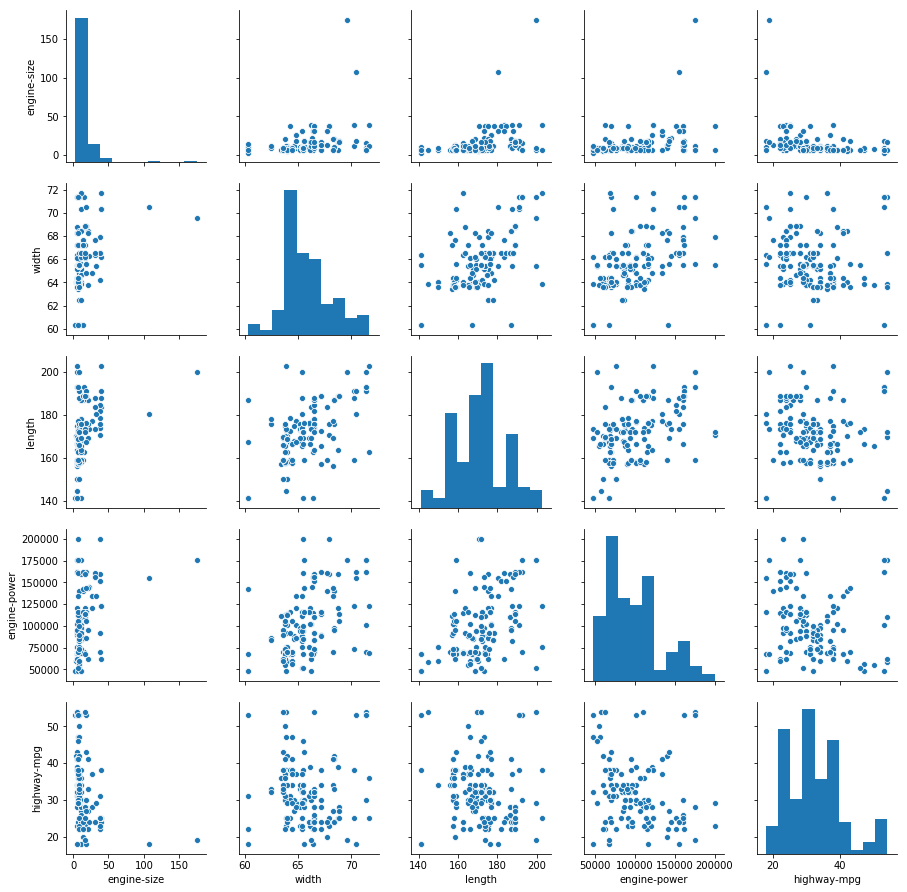

,engine-size,width,length,engine-power,highway-mpg
engine-size,1.000000,0.355554,0.373823,0.406256,-0.339345
width,0.355554,1.000000,0.569162,0.501970,-0.005983
length,0.373823,0.569162,1.000000,0.454824,-0.126187
engine-power,0.406256,0.501970,0.454824,1.000000,-0.228453
highway-mpg,-0.339345,-0.005983,-0.126187,-0.228453,1.000000


In [5]:
# (3) # Your Code goes here:
features_listed = ['engine-size', 'width', 'length', 'engine-power', 'highway-mpg']
plt2 = sns.pairplot(auto_numeric, vars=features_listed)
plt.show()
display(corr_m.loc[features_listed,features_listed])

<div align="right"><font color="blue" size="4">2.0</font></div>

(4) ***Your answer goes here:***
<br> There is no significant correlation relationship between the attributes listed above according to the graphs.

<div align="right"><font color="blue" size="4">0.0</font></div>

<div align="left"><font color="green" size="4">In statistics, 'significance' has a quite specific, mathematical meaning, which in part depends on sample-size, and which you have not tested here. You don't know whether they are significant or not, and that wasn't what was asked. You were just asked to give two examples of correlated attributes, which you have not done.</font></div>

(5) ***Your answer goes here:***
<br> I would choose 'normalized-losses', since it is has the smallest correlation coefficient value (0.015368, which is almost 0) to 'price'.

<div align="right"><font color="blue" size="4">2.0</font></div>

<div align="left"><font color="green" size="4">You may also remove one out of any pair of attributes strongly correlated with each other</font></div>

## 2. Simple Linear Regression

When applying machine learning in practice it can be prudent to start out simple in order to get a feeling for the dataset and for any potential difficulties that might warrant a more sophisticated model. We will thus begin by studying a simple Linear Regression model. Such a model will consider the relationship between a dependent (response) variable and only one independent (explanatory) variable, which we take to be the `engine-power`.

### ========== Question 2.1 --- [5 marks] ==========

1. [Code] Produce a scatter plot of `price` against `engine-power` (label the axis). 
1. [Text] What are your thoughts about the ability of the variable to predict the price?

<div align="right"><font color="blue" size="4">4.0/5.0</font></div>

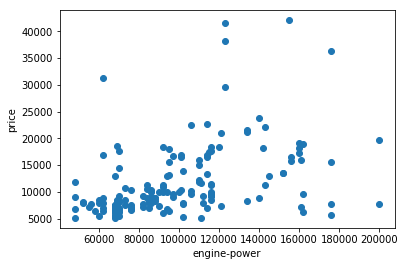

In [6]:
# (1) # Your Code goes here:
plt3 = plt.scatter(x=auto_numeric['engine-power'], y=auto_numeric['price'])
plt.xlabel('engine-power')
plt.ylabel('price')
plt.show()

<div align="right"><font color="blue" size="4">2.0</font></div>

(2) ***Your answer goes here:***
<br> The graph shows a very vague correlation between the 'engine-power' and 'price'. The 'engine-power' attribute itself is not sufficient for predicting the 'price', but it could be one of the factors used to predict the 'price'.

<div align="right"><font color="blue" size="4">2.0</font></div>

<div align="left"><font color="green" size="4">It's also worth noting that the relationship between the variables is somewhat dubiously linear.</font></div>

### ========== Question 2.2 --- [8 marks] ==========

1. [Code] Now visualise the distribution of the car price (again label the axes). Choose a sensible value for the number of bins in the histogram.
1. [Text] Comment on why the price variable *may not* be easy to model using linear regression, and suggest possible preprocessing to improve its applicability. At the same time, explain why it is not conclusive that it is the case at this stage. 
*N.B. There is no need to carry out the preprocessing at this stage, just comments*

<div align="right"><font color="blue" size="4">3.5/8.0</font></div>

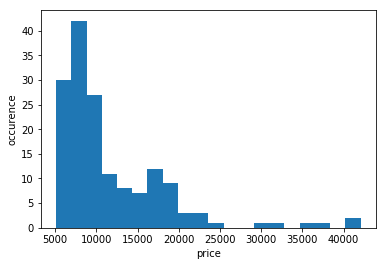

In [7]:
# (1) # Your Code goes here:
plt4 = plt.hist(auto_numeric['price'], bins=20)
plt.xlabel('price')
plt.ylabel('occurence')
plt.show()

<div align="right"><font color="blue" size="4">2.0</font></div>

(2) ***Your answer goes here:***
<br> The prices are not uniformly distributed and there are too few instances for cars with price over 30000. It is possible for those points to become outliers for the model and linear regression is quite sensitive to outliers.
<br> A possible and the simplest solution is to remove the outliers. Also, using appropriate basis functions is also feasible.
<br> It is not conclusive at this stage, since we cannot confirm that those points mentioned are really outliers (they might fit in the model where all the other points would fit in).

<div align="right"><font color="blue" size="4">1.5</font></div>

<div align="left"><font color="green" size="4">There *are* extreme values, but they aren't outliers - they're just expensive cars! They do not lie outside the expected range of prices for cars. You absolutely should not remove valid data - but a log transform or sqrt transform may be useful. However, more tests (for normality of residuals and constant variance) are needed</font></div>

### ========== Question 2.3 --- [3 marks] ==========
We want to prepare our dataset for training/testing. Extract the dependent variable into a vector and the independent attribute into another. Split the dataset with 80% for training and the remaining 20% for testing, naming the resulting arrays `X_train`, `X_test`, `y_train` and `y_test`.

*Hint: you may use Scikit's `train_test_split`: set the random state to 0 for reproducibility*.

**N.B. For technical reasons, `X_train`/`X_test` must be 2D arrays: extend the dimensions of the independent attribute before splitting the dataset, such that the shape of the resulting array is (n,1) where n is the number of instances in the dataset**.

<div align="right"><font color="blue" size="4">3.0/3.0</font></div>

In [8]:
# Your Code goes here:
buffer1 = np.array(auto_numeric['engine-power']).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(buffer1, auto_numeric['price'], train_size=0.8, test_size=0.2, random_state=0)

<div align="right"><font color="blue" size="4">3.0</font></div>

### ========== Question 2.4 --- [4 marks] ==========

Decide on a simple **baseline** to predict the `price` variable. Implement it and display its parameter.

*Hint: This should be just 1 line of code + a print/display*

<div align="right"><font color="blue" size="4">3.0/4.0</font></div>

In [9]:
# Your Code goes here:
# baseline_price = max(set(y_train.tolist()), key=y_train.tolist().count) # mode of the price
baseline_price = y_train.mean()
print('Parameter for baseline model: ', baseline_price)

Parameter for baseline model:  11853.267716535433


<div align="right"><font color="blue" size="4">3.0</font></div>

<div align="left"><font color="green" size="4">Avoid spurious precision. This only needed to be reported at 1 or even 0 d.p.</font></div>

<a id='question_2_5'></a>
### ========== Question 2.5 --- [7 marks] ==========
Now we want to build a simple linear regression model. We will use Scikit-learn's [`LinearRegression`](http://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LinearRegression.html) class. 
1. [Code] Train a `LinearRegression` model and report its parameters: ***N.B.*** *Here we mean the weights of the Regression  Function*.
1. [Text] Interpret the result, and comment on what impact this has *if any* on the relevance of the `engine-power` attribute to predict the `price`.

<div align="right"><font color="blue" size="4">5.0/7.0</font></div>

In [10]:
# (1) # Your Code goes here:
lr = LinearRegression()
lr.fit(X=X_train, y=y_train)
print('Coefficient: ', lr.coef_[0])
print('Intercept:   ', lr.intercept_)

Coefficient:  0.08988388743866613
Intercept:    2823.1218911028263


<div align="right"><font color="blue" size="4">3.0</font></div>

(2) ***Your answer goes here:***
<br> price = 0.08988388743866613 $\times$ engine-power $+$ 2823.1218911028263
<br> The coefficient value is quite small, so engine-power would not pose significant impact on predicting the price.

<div align="right"><font color="blue" size="4">2.0</font></div>

<div align="left"><font color="green" size="4">Because the regression coefficient represents the expected change in price for a one unit change in engine power, the magnitude of that coefficient is partly determined by the magnitude of the units being used - hence changing the scale can impact the coefficient. We therefore cannot judge the usefulness of the attribute from the coefficient.</font></div>

### ========== Question 2.6 --- [9 marks] ==========
Now we will evaluate and compare the performance of our models on the **testing** data.
1. [Code] Produce a scatter plot of the *test-data* price data-points. Add the regression line to the plot and show the predictions on the testing set by using a different marker. Finally plot also the baseline predictor (same figure). Label your axes and provide a [legend](https://matplotlib.org/2.2.3/api/legend_api.html).
1. [Text] Just by looking at this plot, how do the two models compare?

<div align="right"><font color="blue" size="4">8.0/9.0</font></div>

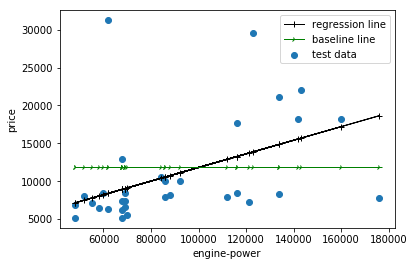

In [11]:
# (1) # Your Code goes here:
plt5 = plt.subplot()
plt5.scatter(x=X_test, y=y_test, label='test data')
plt5.plot(X_test, lr.predict(X_test), color='black', marker='+', lw=1, label='regression line')
plt5.plot(X_test, np.repeat(baseline_price, X_test.shape[0]), color='green', marker='4', lw=1, label='baseline line')
plt.xlabel('engine-power')
plt.ylabel('price')
plt.legend()
plt.show()

<div align="right"><font color="blue" size="4">7.0</font></div>

(2) ***Your answer goes here:***
<br> The linear regression model is better than the baseline model. From the graph, we could spot that there are more points which have less distance to the projection on the line from the linear regression model than that from the baseline model. Thus, the error, which is the sumation of the distances, for the linear regression model is less than that for the baseline model. Therefore, the linear regresssion model is better.

<div align="right"><font color="blue" size="4">1.0</font></div>

<div align="left"><font color="green" size="4">Visually, LR only seems to do a little better than the baseline here.</font></div>

### ========== Question 2.7 --- [20 marks] ==========
 
You might have noticed that the above plot is not easy to interpret. 
1. [Code] Generate another plot, this time showing a histogram of the residuals under both models (label everything). 
1. [Code] Report also the Coefficient of Determination ($R^2$) and Root Mean Squared Error (RMSE) on the same **hold-out** testing set for both predictors. *Hint: Scikit Learn has functions to help in evaluating both measures.*
1. [Text] Comment on the result. *Hint: In your answer, you should discuss what the graph is showing and what the two values are measuring, and finally compare the two models under all measures/plots.*

<div align="right"><font color="blue" size="4">12.5/20.0</font></div>

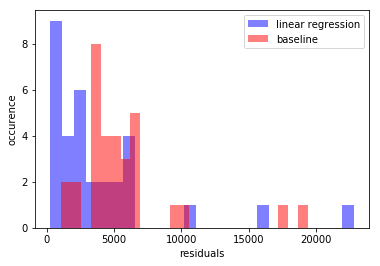

In [12]:
# (1) # Your Code goes here:
plt6 = plt.subplot()
plt6.hist(np.absolute(y_test - lr.predict(X_test)), label='linear regression', bins=25, lw=3, fc=(0, 0, 1, 0.5))
plt6.hist(np.absolute(y_test - baseline_price), label='baseline', bins=25, lw=3, fc=(1, 0, 0, 0.5))
plt.xlabel('residuals')
plt.ylabel('occurence')
plt6.legend()
plt.show()

<div align="right"><font color="blue" size="4">5.0</font></div>

<div align="left"><font color="green" size="4">The absolute residuals was not what was asked for. It may be useful to know overall tendency of the errors.</font></div>

In [13]:
# (2) # Your Code goes here:
r2_lr = r2_score(y_true=y_test, y_pred=lr.predict(X_test))
rmse_lr = np.sqrt(mean_squared_error(y_true=y_test, y_pred=lr.predict(X_test)))
r2_bl = r2_score(y_true=y_test, y_pred=np.repeat(baseline_price, X_test.shape[0]))
rmse_bl = np.sqrt(mean_squared_error(y_true=y_test, y_pred=np.repeat(baseline_price, X_test.shape[0])))
print('linear regression model: r2_score: ', r2_lr, '  RMSE: ', rmse_lr)
print('baseline model:          r2_score: ', r2_bl, 'RMSE: ', rmse_bl)

linear regression model: r2_score:  0.16852372539951466   RMSE:  6153.70386613629
baseline model:          r2_score:  -0.015399260296584893 RMSE:  6800.33149133527


<div align="right"><font color="blue" size="4">4.0</font></div>

(3) ***Your answer goes here:***
<br> Residuals are the absolute values of the differences between the predicted value of the points and the actual value of the points. And the graph shows the occurrence of the residuals with different values for the two models.
<br> R2 score indicates the proportion of the points that lies on the regresssion line. RMSE is a sumation of errors produced by prediction.
<br> From the graph, we could spot that the majority part where the linear regression model lies in has a smaller average residual value than the majority part where the baseline model lies in. In addition, the r2 score for the linear regression model is greater than that for the baseline model (the r2 score of the baseline model is even below zero). Moreover, the RMSE for the linear regression model is smaller than that for the baseline model, which means less error for the linear regression model and the result is consistent with our observa

<div align="right"><font color="blue" size="4">3.5</font></div>

<div align="left"><font color="green" size="4">Residuals are not absolute values. Rather, you have taken absolu residuals
Your characterisation of R^2 is incorrect. Most points aren't on the regression line. It is the proportion of the variance the model accounts for. Also note that although the LR's R^2 is better than baseline, 0.17 is still very small. It accounts for about one-sixth of the variance.
RMSE is the root of the summation of squared errors. Not the sum of errors. Again, note that although LR is better, it's still pretty close to baseline.</font></div>

<a id='question_2_8'></a>
### ========== Question 2.8 --- [9 marks] ==========

So far we have used a hold-out test set for validation.

1. [Text] What are the repurcussions of this for interpreting the above results?

1. [Code] To solve this problem, we will use k-fold cross-validation to evaluate the performance of the regression model. By using Scikit-learn's [`KFold`](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.KFold.html) class construct a 5-fold cross-validation object. Set `shuffle=True` and `random_state=0`. ***[Optional]*** *You may wish to visualise the training/validation indices per fold. The `split` method comes in handy in this case.*

  **N.B. You will use this KFold instance you are about to create throughout most of the remainder of this Assignment - keep track of it!**

1. [Code] Then train a new Linear Regression Model using the [`cross_val_predict`](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.cross_val_predict.html) function. Report the Coefficient of Determination ($R^2$) and Root Mean Squared Error (RMSE).

1. [Text] Relate these to the previous results.



<div align="right"><font color="blue" size="4">7.5/9.0</font></div>

(1) ***Your answer goes here:***
<br> It is very likely that the split is biased, which would cause obvious difference between the performance of the model on the training set than that on the testing set (model would meet relatively more unseen data in the testing set). In this case, the amount of data is too small, so the difference would be amplified. Also, since only one full validation process is taken, the difference would not be minimised.

<div align="right"><font color="blue" size="4">1.5</font></div>

<div align="left"><font color="green" size="4">You haven't compared performance on the test and training sets - with good reason; models should not be tested on their training data.</font></div>

In [14]:
# (2) # Your Code goes here:
kf = KFold(n_splits=5, shuffle=True, random_state=0)
for train_index, test_index in kf.split(auto_numeric['engine-power']):
    display(train_index, test_index)

array([  0,   1,   2,   3,   4,   5,   6,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  20,  21,  22,  23,  25,  27,  28,  29,  30,
        31,  32,  34,  35,  36,  38,  39,  41,  42,  43,  46,  47,  48,
        49,  50,  51,  52,  53,  55,  57,  58,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
        82,  84,  87,  88,  89,  91,  92,  93,  94,  96,  97,  98,  99,
       100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113,
       114, 115, 116, 117, 118, 121, 122, 123, 124, 125, 127, 129, 130,
       132, 133, 135, 136, 137, 138, 139, 140, 141, 143, 145, 146, 147,
       149, 150, 151, 152, 153, 154, 155, 156, 157, 158])

array([  7,   8,  19,  24,  26,  33,  37,  40,  44,  45,  54,  56,  59,
        60,  61,  62,  63,  83,  85,  86,  90,  95, 110, 119, 120, 126,
       128, 131, 134, 142, 144, 148])

array([  0,   1,   3,   4,   5,   6,   7,   8,   9,  11,  12,  13,  14,
        15,  17,  19,  20,  21,  23,  24,  25,  26,  28,  29,  31,  32,
        33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  44,  45,  46,
        47,  48,  49,  50,  52,  53,  54,  55,  56,  57,  58,  59,  60,
        61,  62,  63,  64,  65,  67,  68,  69,  70,  72,  75,  76,  77,
        78,  79,  81,  82,  83,  84,  85,  86,  87,  88,  90,  91,  92,
        94,  95,  98,  99, 102, 103, 104, 105, 106, 110, 111, 112, 114,
       115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 131, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       144, 145, 147, 148, 149, 151, 152, 154, 155, 158])

array([  2,  10,  16,  18,  22,  27,  30,  43,  51,  66,  71,  73,  74,
        80,  89,  93,  96,  97, 100, 101, 107, 108, 109, 113, 130, 132,
       143, 146, 150, 153, 156, 157])

array([  0,   1,   2,   4,   5,   7,   8,   9,  10,  11,  14,  16,  17,
        18,  19,  21,  22,  24,  25,  26,  27,  28,  29,  30,  31,  32,
        33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,
        46,  47,  51,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  65,  66,  67,  70,  71,  72,  73,  74,  77,  79,  80,  81,
        82,  83,  85,  86,  87,  88,  89,  90,  91,  93,  95,  96,  97,
        99, 100, 101, 102, 103, 104, 105, 107, 108, 109, 110, 113, 114,
       115, 116, 117, 119, 120, 121, 123, 124, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 136, 137, 139, 140, 142, 143, 144, 146, 147,
       148, 149, 150, 151, 152, 153, 154, 155, 156, 157])

array([  3,   6,  12,  13,  15,  20,  23,  48,  49,  50,  52,  64,  68,
        69,  75,  76,  78,  84,  92,  94,  98, 106, 111, 112, 118, 122,
       125, 135, 138, 141, 145, 158])

array([  2,   3,   6,   7,   8,   9,  10,  12,  13,  15,  16,  18,  19,
        20,  21,  22,  23,  24,  25,  26,  27,  29,  30,  31,  32,  33,
        36,  37,  39,  40,  43,  44,  45,  47,  48,  49,  50,  51,  52,
        54,  56,  58,  59,  60,  61,  62,  63,  64,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 101, 103, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 117, 118, 119, 120, 122, 125, 126, 127, 128, 130,
       131, 132, 133, 134, 135, 138, 139, 140, 141, 142, 143, 144, 145,
       146, 148, 149, 150, 151, 153, 154, 156, 157, 158])

array([  0,   1,   4,   5,  11,  14,  17,  28,  34,  35,  38,  41,  42,
        46,  53,  55,  57,  65,  91, 102, 104, 105, 116, 121, 123, 124,
       129, 136, 137, 147, 152, 155])

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  22,  23,  24,  26,  27,  28,
        30,  33,  34,  35,  37,  38,  40,  41,  42,  43,  44,  45,  46,
        48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  59,  60,  61,
        62,  63,  64,  65,  66,  68,  69,  71,  73,  74,  75,  76,  78,
        80,  83,  84,  85,  86,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98, 100, 101, 102, 104, 105, 106, 107, 108, 109, 110, 111,
       112, 113, 116, 118, 119, 120, 121, 122, 123, 124, 125, 126, 128,
       129, 130, 131, 132, 134, 135, 136, 137, 138, 141, 142, 143, 144,
       145, 146, 147, 148, 150, 152, 153, 155, 156, 157, 158])

array([  9,  21,  25,  29,  31,  32,  36,  39,  47,  58,  67,  70,  72,
        77,  79,  81,  82,  87,  88,  99, 103, 114, 115, 117, 127, 133,
       139, 140, 149, 151, 154])

<div align="right"><font color="blue" size="4">2.0</font></div>

In [15]:
# (3) # Your Code goes here:
lr2 = LinearRegression()
buffer2 = np.array(auto_numeric['engine-power']).reshape(-1,1)
lr2_pred = cross_val_predict(lr2, buffer2, auto_numeric['price'], cv=kf)

r2_lr2 = r2_score(y_true=auto_numeric['price'], y_pred=lr2_pred)
rmse_lr2 = np.sqrt(mean_squared_error(y_true=auto_numeric['price'], y_pred=lr2_pred))
print('r2_score: ', r2_lr2)
print('RMSE:     ', rmse_lr2)

r2_score:  0.1730052709757075
RMSE:      6114.452118615525


<div align="right"><font color="blue" size="4">4.0</font></div>

(4) ***Your answer goes here:*** 
<br> After using K-fold cross-validation, the performance of the linear regression model becomes better. The r2_score increases about 0.005 and the RMSE decreases about 40. Improvement is not that significant, but is sufficient to prove that K-fold cross-validation is better than hold-out validation.

<div align="right"><font color="blue" size="4">0.0</font></div>

<div align="left"><font color="green" size="4">This misses the point. Remember, all this is doing is the same thing you did previously, but aggregating over 5 different train-test splits. The question to be asking here is not 'which model is more accurate?' (It's five more or less similar models), but 'do I increase the validity of my testing procedure by doing k-fold here, or was a single train-test split sufficient?' (the latter, really)
Also, don't be so quick to assume that any improvement in a score means an improvement in model. As we've seen, this is a noisy process.</font></div>

### ========== Question 2.9 --- (LEVEL 11) --- [18 marks] ==========

1. [Code] Load the new dataset `train_auto_base.csv` into a pandas DataFrame `auto_base`. Again by using the `engine-power` attribute as predictor and `price` as target variable build a LinearRegression model on this dataset. Report the $R^2$ and RMSE metrics for this model (on testing set). 

1. [Code/Text] You should notice a significant change in performance. Where is this coming from? Use visualisation/analysis methods you have learnt to answer this question. Document your code and describe your analysis (via inline comments) as you progress. Your written answer should be just a short paragraph (1-3 sentences) describing your conclusion.

*Hint: you may find it easier to understand what is happening if you use a hold-out test-set rather than cross-validation in this case. Also, make use of pandas methods to help you.*

In [16]:
# (1) # Your Code goes here:
auto_base = pd.read_csv(os.path.join(os.getcwd(), 'datasets', 'train_auto_base.csv'), delimiter = ',')

#kf1 = KFold(n_splits=5, shuffle=True, random_state=0)
#kf1.split(auto_base['engine-power'])

lr3 = LinearRegression()
buffer3 = np.array(auto_base['engine-power']).reshape(-1, 1)
# lr3_pred = cross_val_predict(lr3, buffer3, auto_base['price'], cv=kf1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(buffer3, auto_base['price'], train_size=0.8, test_size=0.2, random_state=0)
lr3.fit(X=X_train1, y=y_train1)
lr3_pred = lr3.predict(X=X_test1)

r2_lr3 = r2_score(y_true=y_test1, y_pred=lr3_pred)
rmse_lr3 = np.sqrt(mean_squared_error(y_true=y_test1, y_pred=lr3_pred))
print('r2_score: ', r2_lr3)
print('RMSE:     ', rmse_lr3)

r2_score:  -0.015399260296584893
RMSE:      6800.33149133527


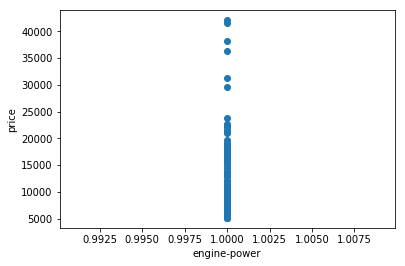

In [17]:
# (2) Show any working code here...
# Your Code goes here:
plt7 = plt.subplot()
plt7.scatter(x=auto_base['engine-power'], y=auto_base['price'])
#plt7.plot(X_train1, lr.predict(X_train1), color='black', marker='+', lw=1')
plt.xlabel('engine-power')
plt.ylabel('price')
plt.show()

(2) - Final Conclusion(s)
***Your answer goes here:***
<br> All of the points has a value of 1 for their 'engine-power' attribute, and the scatter graph shows that all the points perfectly fit in a line, however, a vertical line, which is impossible for the linear regression model to model. Hence, the performance of the model is very bad.

## 3. Multivariate Linear Regression
In this Section we will fit a Multivariate Linear Regression model (still using [`LinearRegression`](http://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LinearRegression.html)) to the dataset: i.e. we will now train a model with **multiple** explanatory variables and ascertain how they affect our ability to predict the retail price of a car. 

**N.B. We will use the *KFold* instance you created in [Question 2.8](#question_2_8) to train & validate our models.**

### ========== Question 3.1 --- [6 marks] ==========

1. [Code] Train a Multi-Variate `LinearRegression` model on the original `auto_numeric` dataframe you loaded in [Question 1.1](#question_1_1), and evaluate it using the *KFold* instance you created in [Question 2.8](#question_2_8) (report RMSE and $R^2$). 
1. [Text] Comment on the result, and compare with the univariate linear regression model we trained previously ([Question 2.5](#question_2_5)).

<div align="right"><font color="blue" size="4">5.5/6.0</font></div>

In [18]:
# (1) # Your Code goes here:
mlr = LinearRegression()
#mlr.fit(X=auto_numeric.drop(columns='price'), y=auto_numeric['price'])
mlr_pred = cross_val_predict(mlr, auto_numeric.drop(columns='price'), auto_numeric['price'], cv=kf)

r2_mlr = r2_score(y_true=auto_numeric['price'], y_pred=mlr_pred)
rmse_mlr = np.sqrt(mean_squared_error(y_true=auto_numeric['price'], y_pred=mlr_pred))
print('r2_score: ', r2_mlr)
print('RMSE:     ', rmse_mlr)

r2_score:  0.4861379844573124
RMSE:      4819.804642834601


<div align="right"><font color="blue" size="4">4.0</font></div>

(2) ***Your answer goes here:***
<br> There is a significant increase in r2_score and a significant decrease in RMSE. The multi-variate linear regression model has a much better performance compared to that of the uni-variate linear regression model.

<div align="right"><font color="blue" size="4">1.5</font></div>

<div align="left"><font color="green" size="4">What does this tell us about the extra variables?</font></div>

### ========== Question 3.2 --- [4 marks] ==========

1. [Code] Examine the scatter plot of `engine-size` vs `price` (plot below)
1. [Text] Why might this cause a problem for linear regression? 

<div align="right"><font color="blue" size="4">4.0/4.0</font></div>

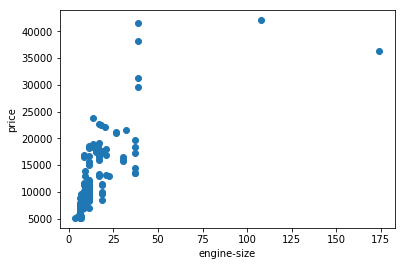

In [19]:
# (1) # Your Code goes here:
plt8 = plt.scatter(x=auto_numeric['engine-size'], y=auto_numeric['price'])
plt.xlabel('engine-size')
plt.ylabel('price')
plt.show()

<div align="right"><font color="blue" size="4">2.0</font></div>

(2) ***Your answer goes here:***
<br> It is quite obvious that most of the points are in the left part of the graph, while there are two points near the top-right corner and they are very far from most of the points. Those outliers could pose a significant influence on the performance of the linear regression model, since the regression line would deviate to the right to some extent in order to minimise the distance to the outliers.

<div align="right"><font color="blue" size="4">2.0</font></div>

<div align="left"><font color="green" size="4">Overall, engine size is skewed with respect to price, and the extreme values we see certainly contribute to that; but we have no reason to suppose they are outliers.</font></div>

<a id='question_3_3'></a>
### ========== Question 3.3 --- [10 marks] ==========
In class we discussed ways of preprocessing features to improve performance in such cases.
1. [Code] Transform the `engine-size` attribute using an appropriate technique from the lectures (document it in your code) and show the transformed data (scatter plot).
1. [Code] Then retrain a (Multi-variate) LinearRegression Model (on all the attributes including the transformed `engine-size`) and report $R^2$ and RMSE. 
1. [Text] How has the performance of the model changed when compared to the previous result? and why so significantly?

<div align="right"><font color="blue" size="4">6.5/10.0</font></div>

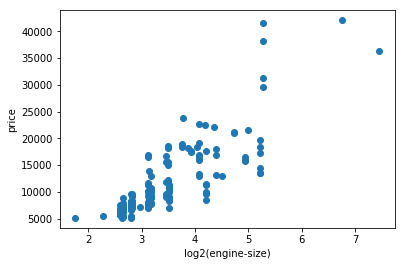

In [20]:
# (1) # Your Code goes here:\
buffer4 = np.log2(auto_numeric['engine-size'])  # Use log to minimise the effect of the outliers
plt9 = plt.scatter(x=buffer4, y=auto_numeric['price'])
plt.xlabel('log2(engine-size)')
plt.ylabel('price')
plt.show()

<div align="right"><font color="blue" size="4">2.0</font></div>

In [21]:
# (2) # Your Code goes here:
buffer5 = auto_numeric.copy()
buffer5['engine-size'] = np.log2(buffer5['engine-size'])

mlr1 = LinearRegression()
mlr1_pred = cross_val_predict(mlr1, buffer5.drop(columns='price'), buffer5['price'], cv=kf)

r2_mlr1 = r2_score(y_true=buffer5['price'], y_pred=mlr1_pred)
rmse_mlr1 = np.sqrt(mean_squared_error(y_true=buffer5['price'], y_pred=mlr1_pred))
print('r2_score: ', r2_mlr1)
print('RMSE:     ', rmse_mlr1)

r2_score:  0.689612268028951
RMSE:      3745.9195975598454


<div align="right"><font color="blue" size="4">3.0</font></div>

***Your answer goes here:***
<br> The r2_score increased significantly and the RMSE decreased significantly. The new model has achieved a giant progress. From the results, we could see that the outliers mentioned before did pose a really significant influence on the performance of the model. Because the outliers have a relatively large value, the logarithm would minimise the value to a greater extent, and the influence of the outliers would minimise greatly.

<div align="right"><font color="blue" size="4">1.5</font></div>

<div align="left"><font color="green" size="4">Note that:
* For this to have had so big an effect, e.s. must have been an important predictor already.
* The relationship between price and log(e.s.) is much more linear - it isn't just the 'outliers'.</font></div>

### ========== Question 3.4 --- (LEVEL 11) --- [12 marks] ==========

The simplicity of Linear Regression allows us to interpret the importance of certain features in predicting target variables. However this is not as straightforward as just reading off the coefficients of each of the attributes and ranking them in order of magnitude.

1. [Text] Why is this? How can we *linearly* preprocess the attributes to allow for a comparison? Justify your answer.
1. [Code] Perform the preprocessing you just mentioned on the transformed data-set from [Question 3.3](#question_3_3), retrain the Linear-Regressor and report the coefficients in a readable manner. *Tip: To simplify matters, you may abuse standard practice and train the model once on the entire data-set with no validation/test set.*
1. [Text] Which are the three (3) most important features for predicting price under this model?

(1) ***Your answer goes here:***

In [22]:
# (2) # Your Code goes here:

(3) ***Your answer goes here:***

### ========== Question 3.5 --- (LEVEL 11) --- [10 marks] ==========

In the lectures we discussed another form of extension to the basic linear-regression model: the introduction of basis functions. This method attempts to capture non-linearities in the input-output mapping.

1. [Text] How would you choose the features to test higher-orders on? And how would you choose the best polynomial order for these features?
1. [Code] Load the csv file `train_auto_nonlinear.csv` into a new dataframe (this is a standard version of the transformed data-set from [Question 3.3](#question_3_3)). Add a second-order basis to the two attributes `length` and `engine-power` and train a new LinearRegression model. Report the $R^2$ and RMSE performance.
1. [Text] Comment on the result in relation to those in [Question 3.3](#question_3_3).

(1) ***Your answer goes here:***

In [23]:
# (2) # Your Code goes here:

(3) ***Your answer goes here:***